<a href="https://colab.research.google.com/github/ahoucbvtw/Linear-Regression/blob/main/Linear-Regression_Gradient-descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

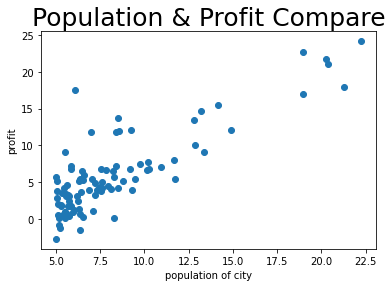

In [ ]:
# 讀資料
data = np.genfromtxt("data1.txt", delimiter = ",")
X_data = data[:,0]
Y_data = data[:,1]

# 畫圖
plt.scatter(X_data, Y_data)
plt.title("Population & Profit Compare", fontsize = 25)
plt.xlabel("population of city")
plt.ylabel("profit")
plt.show()

成本函數

H(X)= a*X + b 這條線到所有資料點在其「Y 方向」距離平方和

以線段H(X)來說的話： a = 斜率，b = 截距

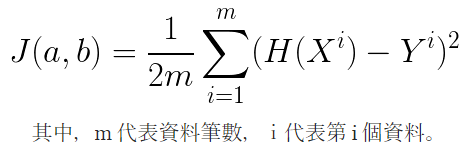

In [ ]:
# 定義成本函數
# tan_theta = H(X)的斜率
# b = H(X)的截距

def J(tan_theta, b, x_data, y_data):
    m = len(x_data) # 資料筆數
    total_J = 0 # 求總和用變數
    for i in range(0, m):
        total_J += ((tan_theta * x_data[i] + b) - y_data[i]) ** 2
    return total_J / (2*m)

梯度下降演算法(成本函數之最小值)

對成本函數中的(a,b)分別做偏微分

也就是求H(X)= a*X + b中的斜率(a)和截距(b)的偏微分

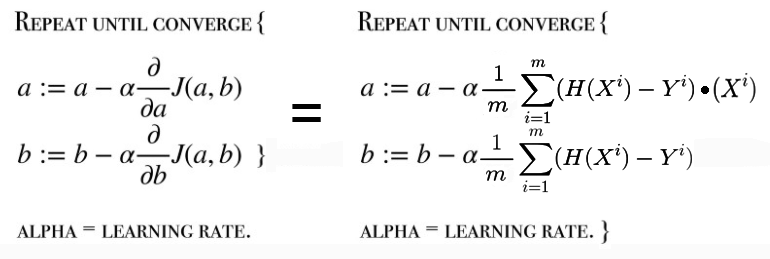

In [ ]:
# 定義梯度下降演算法
# tan_theta = H(X)的斜率
# b = H(X)的截距
# lr = 學習率
# epochs = 訓練次數

def gradient_descent(x_data, y_data, tan_theta, b, lr, epochs):
    m = len(x_data) # 資料筆數
    # 訓練次數
    for i in range(epochs):
        tan_theta_gradient_sum = 0 # 求對斜率做偏微分總和用變數
        b_gradient_sum = 0 # 求對截距做偏微分總和用變數
        
        # 先計算總和(Σ那一串公式)
        for z in range(0, m):
            tan_theta_gradient_sum += (1/m) * ((tan_theta * x_data[z] + b) - y_data[z]) * x_data[z]
            b_gradient_sum += (1/m) * ((tan_theta * x_data[z] + b) - y_data[z])
        
        # 依照訓練次數每次更新一次新的值
        tan_theta = tan_theta - (lr * tan_theta_gradient_sum)
        b = b - (lr * b_gradient_sum)

    return tan_theta, b

最一開始的斜率 = 0, 截距 = 0, 成本函數 = 32.072733877455654

執行 50000 次, 最適合線段的斜率 = 1.0308684561974206, 截距 = -2.2815680468674353, 成本函數 = 4.7141912387484

執行 200000 次, 最適合線段的斜率 = 1.1821778670636365, 截距 = -3.787721097115985, 成本函數 = 4.47803443560901

執行 2000000 次, 最適合線段的斜率 = 1.1930336441882965, 截距 = -3.8957808782990493, 成本函數 = 4.476971375975177

In [ ]:
# tan_theta = H(X)的斜率
# b = H(X)的截距
# lr = 學習率
# epochs = 訓練次數

tan_theta = 0
b = 0
lr = 0.0001
epochs = 2000000

# 最一開始成本函數數值
cost_begin = J(tan_theta, b, X_data, Y_data)
print("最一開始的斜率 = {0}, 截距 = {1}, 成本函數 = {2}".format(tan_theta, b, cost))

# 利用梯度下降計算最適合線段之斜率及截距
tan_theta_fit, b_fit = gradient_descent(X_data, Y_data, tan_theta, b, lr, epochs)
cost_final = J(tan_theta_fit, b_fit, X_data, Y_data)
print("執行 {0} 次, 最適合線段的斜率 = {1}, 截距 = {2}, 成本函數 = {3}".format(epochs, tan_theta_fit, b_fit, cost_final))

最一開始的斜率 = 0, 截距 = 0, 成本函數 = 32.072733877455654
執行 2000000 次, 最適合線段的斜率 = 1.1930336441882965, 截距 = -3.8957808782990493, 成本函數 = 4.476971375975177


In [ ]:
# 利用算出來的最適合線段去得出其Y_fit值
Y_fit = (tan_theta_fit*(X_data)) + b_fit
Y_fit

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

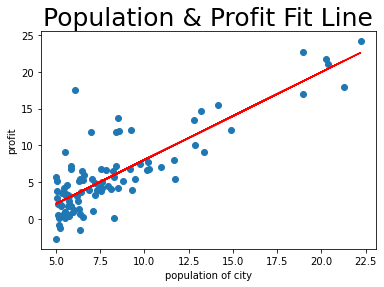

In [ ]:
# 畫圖
plt.scatter(X_data, Y_data)
plt.plot(X_data, Y_fit, "r")
plt.title("Population & Profit Fit Line", fontsize = 25)
plt.xlabel("population of city")
plt.ylabel("profit")
plt.show()